In [1]:
import pandas as pd
df = pd.read_csv('data/segments-icw-cj-mh-2020-08-20.csv', sep=',')
df.head()

DNA-matchnings-ID                    Namn  \
0  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
1  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
2  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
3  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
4  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   

    Matchnamn  Kromosom  Starta plats  Avsluta plats  Börja RSID Avsluta RSID  \
0  Lars Ekros         1     105063644      180233647  rs12042136     rs357051   
1  Lars Ekros         1     203115832      224881828   rs6686206    rs1436171   
2  Lars Ekros         1     234382599      242042374  rs12119646  rs191573829   
3  Lars Ekros         2       7921970      122966157   rs6745856    rs6751865   
4  Lars Ekros         2     151001420      243068403    rs330586  rs140927403   

   Centimorgan  Snp's  
0         63.7  25856  
1         27.5  12160  
2         18.7   5504  
3        121.8  57344  
4        102.0  47743

In [2]:
# df.columns
df = df.rename(
    columns={
        # MyHeritage (svenska bulk):
        'DNA-matchnings-ID': 'Match ID',
        'Namn': 'Name',
        'Matchnamn': 'Match',
        'Kromosom': 'Chr',
        'Starta plats': 'Start',
        'Avsluta plats': 'End',
        'Börja RSID': 'Start RSID',
        'Avsluta RSID': 'End RSID',
        'Centimorgan': 'cM',
        'Snp\'s': 'SNPs',
        # MyHeritage (Chromosome browser):
        'Match Name': 'Match',
        'Chromosome': 'Chr',
        'Start Location': 'Start',
        'End Location': 'End',
        'Centimorgans': 'cM',
        # FamilyTreeDNA:
        'Matching SNPs': 'SNPs'
    }
)
# We could also add these columns from DNA Painter:
# Confidence, Group, Side, Notes, Colour
df.head()

Match ID                    Name  \
0  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
1  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
2  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
3  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
4  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   

        Match  Chr      Start        End  Start RSID     End RSID     cM  \
0  Lars Ekros    1  105063644  180233647  rs12042136     rs357051   63.7   
1  Lars Ekros    1  203115832  224881828   rs6686206    rs1436171   27.5   
2  Lars Ekros    1  234382599  242042374  rs12119646  rs191573829   18.7   
3  Lars Ekros    2    7921970  122966157   rs6745856    rs6751865  121.8   
4  Lars Ekros    2  151001420  243068403    rs330586  rs140927403  102.0   

    SNPs  
0  25856  
1  12160  
2   5504  
3  57344  
4  47743

In [3]:
df['Interval'] = df.apply(
    lambda row: pd.Interval(row['Start'], row['End'], closed='both'),
    axis='columns'
)
df.head()

Match ID                    Name  \
0  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
1  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
2  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
3  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   
4  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...  Carl-Johan Sveningsson   

        Match  Chr      Start        End  Start RSID     End RSID     cM  \
0  Lars Ekros    1  105063644  180233647  rs12042136     rs357051   63.7   
1  Lars Ekros    1  203115832  224881828   rs6686206    rs1436171   27.5   
2  Lars Ekros    1  234382599  242042374  rs12119646  rs191573829   18.7   
3  Lars Ekros    2    7921970  122966157   rs6745856    rs6751865  121.8   
4  Lars Ekros    2  151001420  243068403    rs330586  rs140927403  102.0   

    SNPs                Interval  
0  25856  [105063644, 180233647]  
1  12160  [203115832, 224881828]  
2   5504  [234382599, 242042374]  
3  57344    [7921970, 122966157]  
4  47743  [151001420, 243068403]

In [4]:
df[df['Chr'] == 22]

Match ID  \
28    D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...   
63    D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-8F6DA...   
82    D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-AB7A0...   
104   D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-A4504...   
105   D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-A4504...   
...                                                 ...   
9149  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-94444...   
9152  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3CBB0...   
9258  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-BDB31...   
9313  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-2DEDE...   
9320  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-7949E...   

                        Name                   Match  Chr     Start       End  \
28    Carl-Johan Sveningsson              Lars Ekros   22  16055122  51214796   
63    Carl-Johan Sveningsson       Malin Sveningsson   22  19677822  49684580   
82    Carl-Johan Sveningsson        Andreas Holmgren   22  18502566  35177350   
104   Carl-Johan Sveningsson     Svening Svenningson   22  16055122  23648478   
105   Carl-Johan Sveningsson     Svening Svenningson   22  37619543  48745675   
...                      ...                     ...  ...       ...       ...   
9149  Carl-Johan Sveningsson           Ingelöv Rosby   22  27211572  32950053   
9152  Carl-Johan Sveningsson  Jeremy Cleve Gustafson   22  27211572  32950053   
9258  Carl-Johan Sveningsson       Mikayla Jennewine   22  17493293  19844671   
9313  Carl-Johan Sveningsson              David Dunn   22  17304887  19677354   
9320  Carl-Johan Sveningsson             Jackie Pace   22  17304887  19677354   

       Start RSID     End RSID    cM   SNPs              Interval  
28    rs117246541  rs190639024  74.1  22399  [16055122, 51214796]  
63      rs5992460    rs2187753  60.5  19456  [19677822, 49684580]  
82    rs117233348     rs137294  33.3   9984  [18502566, 35177350]  
104   rs117246541    rs2267027  20.2   3712  [16055122, 23648478]  
105     rs6000617    rs4239939  20.1   7168  [37619543, 48745675]  
...           ...          ...   ...    ...                   ...  
9149    rs2227187    rs2105865   8.2   3328  [27211572, 32950053]  
9152    rs2227187    rs2105865   8.2   3328  [27211572, 32950053]  
9258    rs2399153   rs13053155   8.1   1536  [17493293, 19844671]  
9313     rs983305    rs7285884   8.0   1536  [17304887, 19677354]  
9320     rs983305    rs7285884   8.0   1536  [17304887, 19677354]  

[502 rows x 11 columns]

In [5]:
matches = df[['Match ID', 'Name', 'Match']].drop_duplicates()
selected_matchids = matches['Match ID'][matches['Match'].str.contains('Kåre Høier') | matches['Match'].str.contains('Spanopoulos') | matches['Match'].str.contains('Christian Sjölund')]
selected_matchids.head()

199    D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-7DCEB...
583    D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-4DEA1...
624    D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-E700B...
Name: Match ID, dtype: object

In [6]:
segments = df[['Match ID', 'Chr', 'Start', 'End', 'Start RSID', 'End RSID', 'cM', 'SNPs', 'Interval']]
# segments = segments[segments['Match ID'].isin(selected_matchids)]
segments.head()

Match ID  Chr      Start  \
0  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...    1  105063644   
1  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...    1  203115832   
2  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...    1  234382599   
3  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...    2    7921970   
4  D-74C86737-EDFA-45C6-8B35-CB41EE958B1D-D-3F7DD...    2  151001420   

         End  Start RSID     End RSID     cM   SNPs                Interval  
0  180233647  rs12042136     rs357051   63.7  25856  [105063644, 180233647]  
1  224881828   rs6686206    rs1436171   27.5  12160  [203115832, 224881828]  
2  242042374  rs12119646  rs191573829   18.7   5504  [234382599, 242042374]  
3  122966157   rs6745856    rs6751865  121.8  57344    [7921970, 122966157]  
4  243068403    rs330586  rs140927403  102.0  47743  [151001420, 243068403]

In [7]:
# https://en.wikipedia.org/wiki/Single-nucleotide_polymorphism
chr_bplen = {
    1: 214066000,
    2: 222889000,
    3: 186938000,
    4: 169035000,
    5: 170954000,
    6: 165022000,
    7: 149414000,
    8: 125148000,
    9: 107440000,
    10: 127894000,
    11: 129193000,
    12: 125198000,
    13: 93711000,
    14: 89344000,
    15: 73467000,
    16: 74037000,
    17: 73367000,
    18: 73078000,
    19: 56044000,
    20: 63317000,
    21: 33824000,
    22: 33786000
}

In [8]:
heatmap = pd.DataFrame()
for chr, bplen in chr_bplen.items():
    segments_chr = segments[segments['Chr'] == chr]
    if segments_chr.empty:
        continue
    # Chr 1: 214066000 bp / 1000 samples ~ 200000 bp
    bp_samples = list(range(0, bplen, 200000))
    matching = [sum(
            segments_chr.apply(
                    lambda row: bp in row['Interval'],
                    axis='columns'
                )) for bp in bp_samples
        ]
    heatmap[chr] = pd.Series(matching,
            index = bp_samples)
    print(f'Appended {sum(matching)} matching samples for chromosome {chr}')

Appended 22930 matching samples for chromosome 1
Appended 54160 matching samples for chromosome 2
Appended 13026 matching samples for chromosome 3
Appended 25257 matching samples for chromosome 4
Appended 23752 matching samples for chromosome 5
Appended 17103 matching samples for chromosome 6
Appended 11723 matching samples for chromosome 7
Appended 8798 matching samples for chromosome 8
Appended 8627 matching samples for chromosome 9
Appended 8304 matching samples for chromosome 10
Appended 5791 matching samples for chromosome 11
Appended 19771 matching samples for chromosome 12
Appended 8347 matching samples for chromosome 13
Appended 5333 matching samples for chromosome 14
Appended 6747 matching samples for chromosome 15
Appended 10235 matching samples for chromosome 16
Appended 7279 matching samples for chromosome 17
Appended 7167 matching samples for chromosome 18
Appended 4692 matching samples for chromosome 19
Appended 5173 matching samples for chromosome 20
Appended 3033 matchi

In [9]:
heatmap.head()

1   2    3    4    5    6    7    8     9    10  ...   13   14   15  \
0        0   0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0  0.0   
200000   0   0  6.0  3.0  7.0  7.0  5.0  7.0  11.0  1.0  ...  0.0  0.0  0.0   
400000   0   0  6.0  3.0  7.0  8.0  5.0  8.0  15.0  1.0  ...  0.0  0.0  0.0   
600000   0   0  6.0  7.0  9.0  8.0  6.0  8.0  20.0  1.0  ...  0.0  0.0  0.0   
800000   8   0  6.0  7.0  9.0  8.0  6.0  8.0  37.0  1.0  ...  0.0  0.0  0.0   

          16   17   18    19   20   21   22  
0        0.0  0.0  0.0   0.0  0.0  0.0  0.0  
200000  37.0  4.0  5.0   0.0  3.0  0.0  0.0  
400000  39.0  4.0  6.0  11.0  4.0  0.0  0.0  
600000  40.0  4.0  8.0  14.0  4.0  0.0  0.0  
800000  48.0  4.0  8.0  21.0  5.0  0.0  0.0  

[5 rows x 22 columns]

<AxesSubplot:>

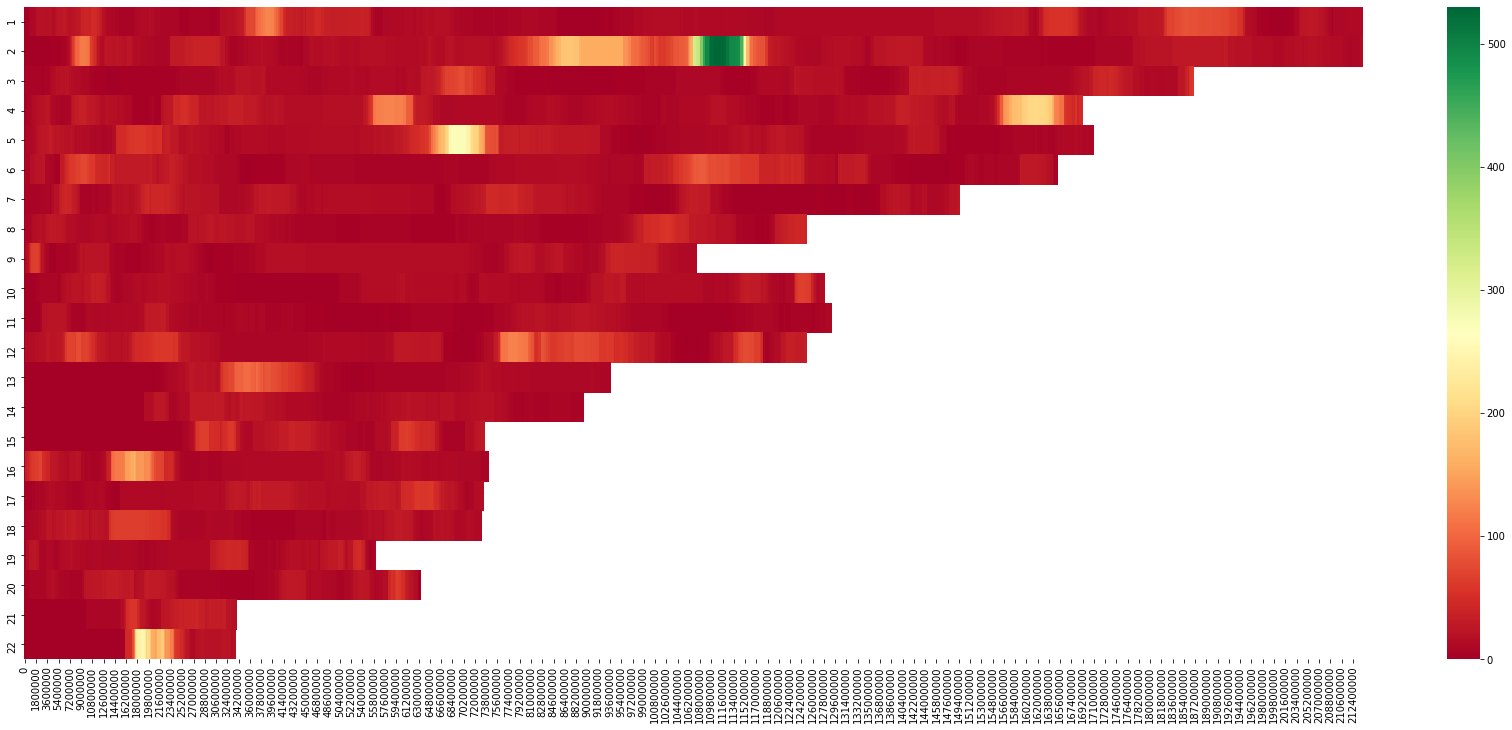

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig, ax = plt.subplots(figsize = (30, 12))
sns.heatmap(heatmap.transpose(), cmap ='RdYlGn')